SOBEL EDGE DETECTION

In [17]:
import cv2
import numpy as np

In [18]:
def sobel_x():

  gaussian_1d = np.array([1,2,1],np.float32)
  x_derivative = np.array([-1,0,1],np.float32)
  s_x = np.outer(gaussian_1d,x_derivative)

  return s_x

In [19]:
def sobel_y():

  gaussian_1d = np.array([1,2,1],np.float32)
  x_derivative = np.array([-1,0,1],np.float32)
  s_y = np.outer(x_derivative,gaussian_1d)

  return s_y

In [20]:
def padding(image):

  padded_image = np.pad(image , ((1,1),(1,1)) , 'constant', constant_values=(0,0) )

  return padded_image

In [21]:
def conv2d(image, ftr):
    image = padding(image)
    s = ftr.shape + tuple(np.subtract(image.shape, ftr.shape) + 1)
    sub_image = np.lib.stride_tricks.as_strided(image, shape = s, strides = image.strides * 2)
    return np.einsum('ij,ijkl->kl', ftr, sub_image)

In [22]:
def sobel(gray_image):

  G_x = conv2d(gray_image , sobel_x())
  G_y = conv2d(gray_image , sobel_y())


  M = np.sqrt( np.power(G_x,2)  +  np.power(G_y,2) )


  theta = np.arctan2(G_y,G_x)


  return M, theta

In [23]:
img = cv2.imread("image.jpeg", cv2.IMREAD_COLOR)

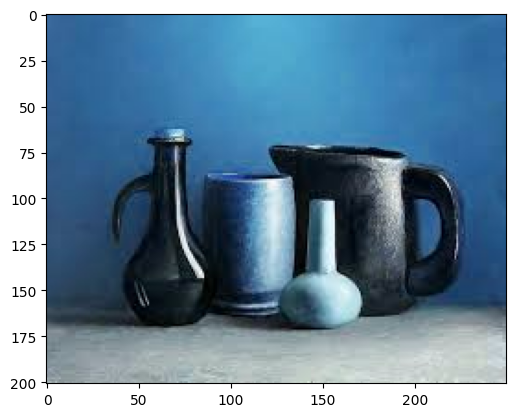

In [24]:
import matplotlib.pyplot as plt
plt.imshow(img)

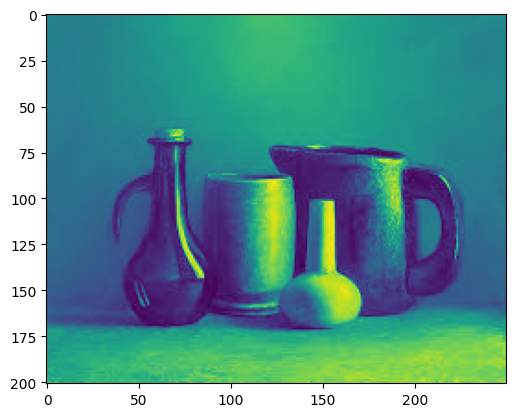

In [25]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

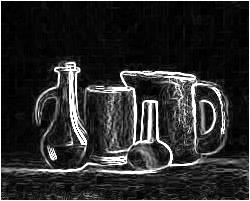

True

In [26]:
from google.colab.patches import cv2_imshow
M, theta = sobel(gray_image)
cv2_imshow(M)
cv2.waitKey(0)
cv2.imwrite("/content/sobel.jpeg",np.uint8(M))

CANNY EDGE DETECTION

In [27]:
import cv2
import numpy as np

In [28]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180


    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255

               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass

    return Z

In [29]:
def threshold(img, lowThresholdRatio , highThresholdRatio ):

    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)

    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)

    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return res, weak, strong

In [30]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

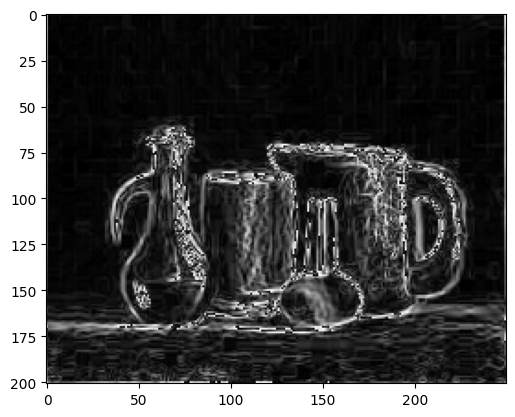

In [31]:
img = cv2.imread("sobel.jpeg", cv2.IMREAD_COLOR)
import matplotlib.pyplot as plt
plt.imshow(img)

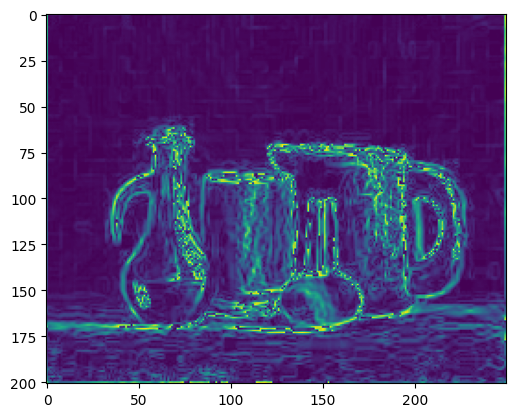

In [32]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

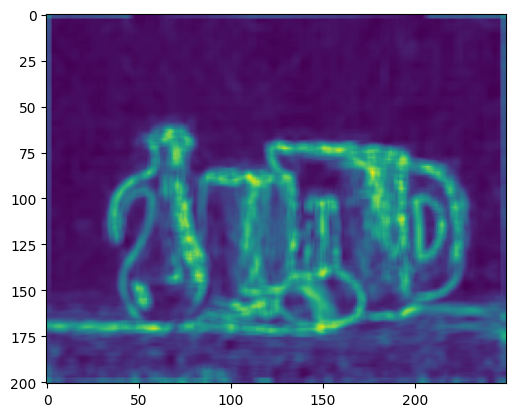

In [33]:
blur_img=cv2.GaussianBlur(gray_image,(5,5),cv2.BORDER_DEFAULT)
plt.imshow(blur_img)

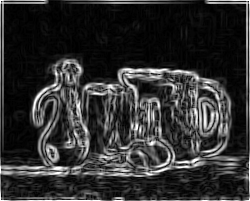

-1

In [34]:
from google.colab.patches import cv2_imshow
M1, theta1 = sobel(blur_img)
cv2_imshow(M1)
cv2.waitKey(0)

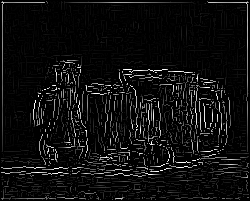

-1

In [35]:
  Z = non_max_suppression(M1,theta1)
  cv2_imshow(Z)
  cv2.waitKey(0)

In [36]:
res, weak, strong = threshold(Z, lowThresholdRatio=0.05, highThresholdRatio=0.09)

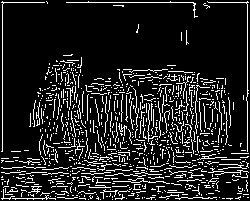

True

In [37]:
canny =  hysteresis(res, weak, strong=255)
cv2_imshow(canny)
cv2.waitKey(0)
cv2.imwrite('/content/canny.png' , canny)